In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df_hp = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Science_with_Python\house_pricing.csv")

In [3]:
df_hp.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


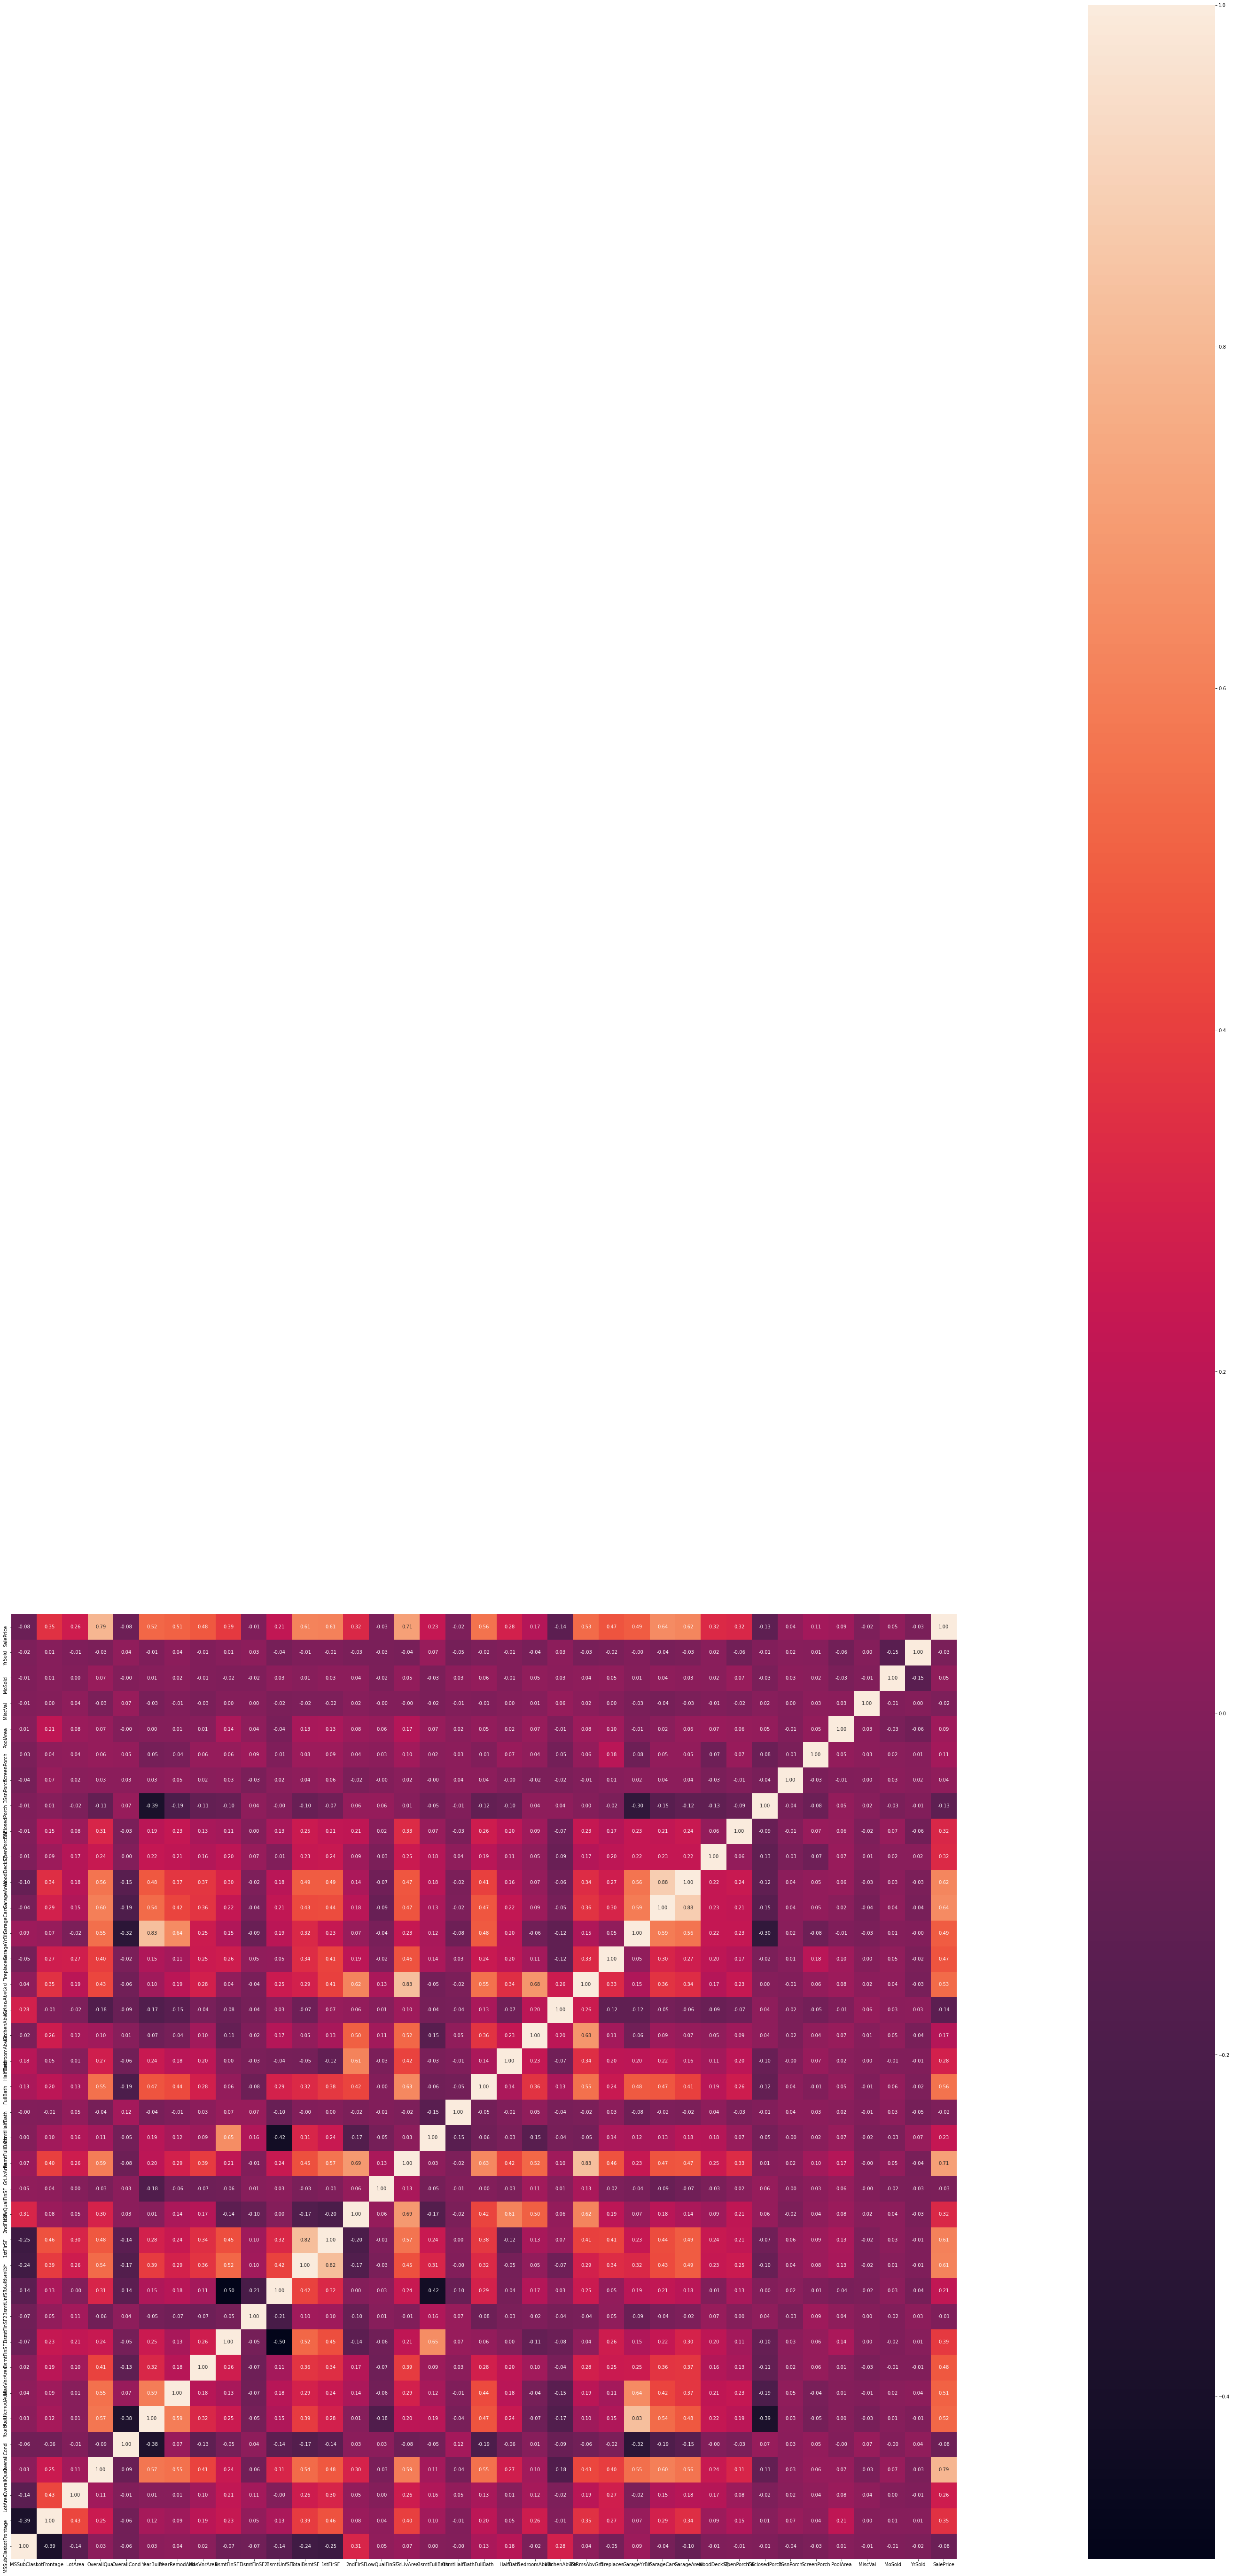

In [5]:
#heatmap
corr = df_hp.corr()
plt.figure(figsize = (100, 100))
a = sb.heatmap(corr, annot = True, fmt = '.2f', square = True)
a.set_ylim(0, 100);

In [6]:
#selection of some columns
sel_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt',
            'GarageArea', 'SalePrice']

df = df_hp[sel_cols]

(0.0, 7.0)

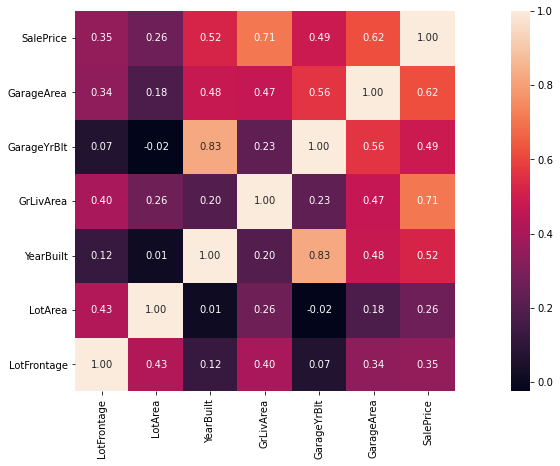

In [7]:
#heatmap
corr = df.corr()
plt.figure(figsize = (20, 7))
a = sb.heatmap(corr, annot = True, fmt = '.2f', square = True)
a.set_ylim(0, 7)


Text(0.5, 0, 'Garage Area')

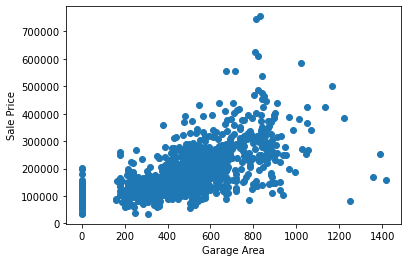

In [8]:
#scatter plots
plt.figure()
plt.scatter(df['GarageArea'], df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')

Text(0.5, 0, 'Live Area')

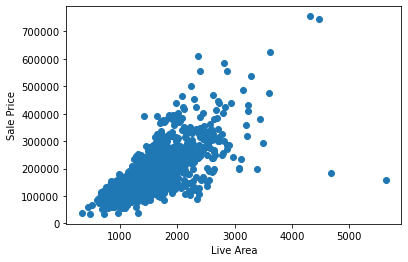

In [9]:
plt.figure()
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Live Area')

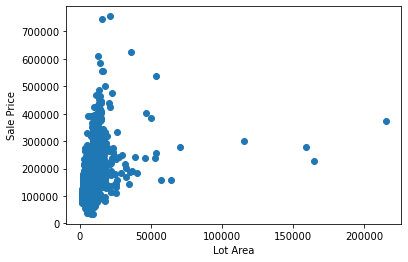

In [10]:
plt.figure()
plt.scatter(df['LotArea'], df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Lot Area');

## Simple Linear Regression


In [11]:
x = df['GrLivArea'].values #get column Live Area
y = df['SalePrice'].values #get column Sale Price

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

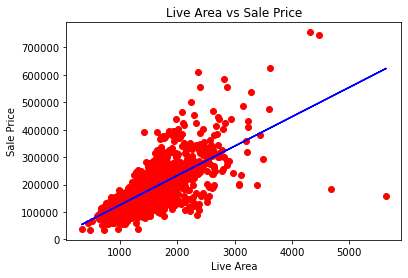

In [12]:
#simple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)


plt.figure()
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'blue')
plt.title('Live Area vs Sale Price')
plt.xlabel('Live Area')
plt.ylabel('Sale Price')
plt.show()

#finding error
msqe = sum((y_pred - y) * (y_pred - y)) / y.shape[0]
rmse = np.sqrt(msqe)

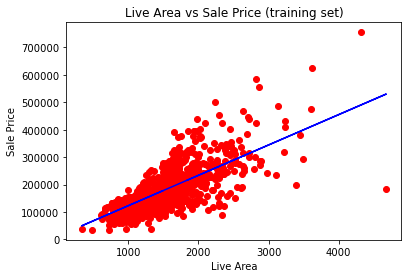

In [14]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

#fit simple linear regression model on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

#training set results
plt.figure()
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Live Area vs Sale Price (training set)')
plt.xlabel('Live Area')
plt.ylabel('Sale Price')
plt.show()


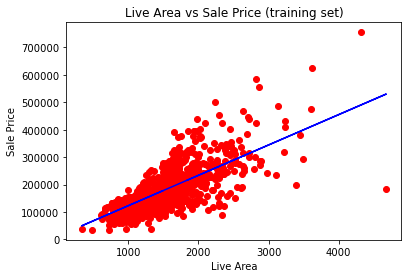

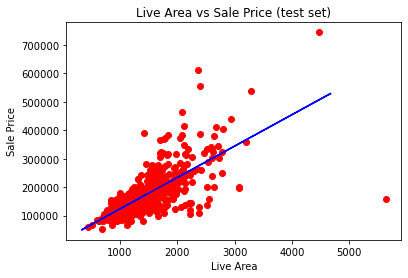

In [15]:
#training set results
plt.figure()
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Live Area vs Sale Price (training set)')
plt.xlabel('Live Area')
plt.ylabel('Sale Price')
plt.show()

#test set results
plt.figure()
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Live Area vs Sale Price (test set)')
plt.xlabel('Live Area')
plt.ylabel('Sale Price')
plt.show()

msqe = sum((y_pred - y_test) * (y_pred - y_test)) / y.shape[0]
rmse = np.sqrt(msqe)

## Multiple Linear Regression

In [26]:
df_hp = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Science_with_Python\house_pricing2.csv")

In [27]:
#selection of some columns
sel_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt',
            'GarageArea', 'Heating', 'SalePrice']
df = df_hp[sel_cols]

In [28]:
x = df.iloc[:, : -1].values
y = df.iloc[: , 7].values

print(x)

print(df.isnull().sum())

[[65.0 8450 2003 ... 2003.0 548 'GasA']
 [80.0 9600 1976 ... 1976.0 460 'GasA']
 [68.0 11250 2001 ... 2001.0 608 'GasA']
 ...
 [78.0 11344 1958 ... 1958.0 315 'GasW']
 [60.0 10440 1920 ... 1920.0 520 'GasW']
 [60.0 8520 1916 ... 1916.0 216 'GasW']]
LotFrontage    256
LotArea          0
YearBuilt        0
GrLivArea        0
GarageYrBlt     76
GarageArea       0
Heating          0
SalePrice        0
dtype: int64


In [29]:
#encoding the categorical variable (heating)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(), [6])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

#avoid dummy variable duplications
x = x[:, 1:]

a = x

In [30]:
#imputation for lotFrontage and garageYrBlt
from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan, strategy = 'median', verbose = 0)
missingvalues = missingvalues.fit(x[:, 1:])
x[:, 1:] = missingvalues.transform(x[:, 1:])

In [31]:
#split dataset into train and test splits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [33]:
#fit multiple linear regression model on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

msqe = sum((y_pred - y_test) * (y_pred - y_test)) / y.shape[0]
rmse = np.sqrt(msqe)
print(rmse)

25859.462821134446


## Polynomial Linear Regreesion

In [ ]:
df_hp = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Science_with_Python\house_pricing.csv")

In [34]:
#selection of some columns
sel_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt',
            'GarageArea', 'SalePrice']

df = df_hp[sel_cols]


In [35]:
x = df['GrLivArea'].values #get column Live Area
y = df['SalePrice'].values #get column Sale Price

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)


In [36]:
#simple linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

y_pred = lin_reg.predict(x)

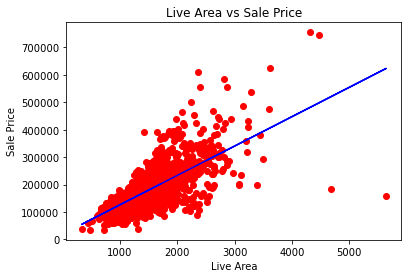

In [37]:
#visualize simple linear regression
plt.figure()
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'blue')
plt.title('Live Area vs Sale Price')
plt.xlabel('Live Area')
plt.ylabel('Sale Price')
plt.show()

In [38]:
#finding error
msqe = sum((y_pred - y) * (y_pred - y)) / y.shape[0]
rmse = np.sqrt(msqe)
print(rmse)

[55919.77804948]


In [39]:
#polynomial linear regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)

LinearRegression()

In [40]:
#sort x
s_x = np.sort(x, axis=None).reshape(-1, 1)

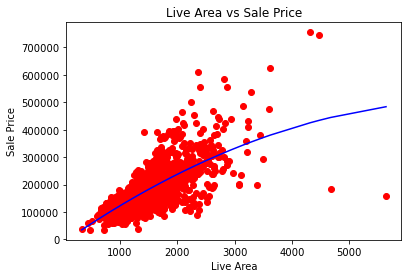

In [41]:
#visualize polynomial linear regression
plt.scatter(x, y, color = 'red')
plt.plot(s_x, lin_reg2.predict(poly_reg.fit_transform(s_x)), color = 'blue')
plt.title('Live Area vs Sale Price')
plt.xlabel('Live Area')
plt.ylabel('Sale Price')
plt.show()